The first part of data analysis is an initial exploration of the data . This is important because oddities in the data can cause bugs and muddle the results.

Before deeper questions are explored you must answer the simpler ones about the form and the quality of the data.

In [63]:
import pandas as pd
import numpy as np
import os

In [64]:
titanic_train = pd.read_csv('/Users/teddy/Documents/GitHub/Week6/McKinneyBook/Chapter5/titanic/train.csv')

It's a good idea to start off by checking the dimentions of the data.

In [65]:
titanic_train.shape

(891, 12)

In [66]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Notice that nonnumerical columns are not included in df.describe().
We can get a summary of the categorical variables by passing only those columns to describe()

In [69]:
categorical = titanic_train.dtypes[titanic_train.dtypes == 'object'].index
print(categorical)
titanic_train[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


After looking at the data you should ask yourself a few questions:

1. Do I need all of the variables?
2. Should I transform any variables?
3. Are there any missing values, outliers, or other anomalies?
4. Should I create new variables?

Each of these question will be adressed starting with do I need all of the variables?

PassengerID is an unnecessary variable because it is just a unique identifier for each passenger. The purpose of this data is to predict survival, so they don't need to have an ID.

In [70]:
del titanic_train['PassengerId']

The 3 more variable to be deliberated upon are Name, Ticket, and Cabin. Name is not necessary for survival prediction, Ticket is a number and might not have much predictive power, and Cabin is missing a lot of data.

In [71]:
sorted(titanic_train["Name"])[0:15]

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton']

In [72]:
titanic_train["Name"].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

We can keep it but its not something that can be used to predict survival.
Name are fun to look at.

In [73]:
titanic_train["Ticket"].head(15)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [74]:
titanic_train["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

When a variable has many unique values as observations, it is not very useful for prediction.
This qualifies for deletion.

In [75]:
del titanic_train["Ticket"]

In [76]:
titanic_train["Cabin"].head(15)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [77]:
titanic_train["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

The Cabin variable has a lot of missing values and unique values, however the cabin number could potentially be useful for predicting survival. So we will keep it.

After considering wether a variable should be removed you must consider wether to transform any variables. Some of your variables may be encoded as data types that don't fit well with what the data is trying to tell you. We could instead encode the data as categorical variables.

In [78]:
new_survived = pd.Categorical(titanic_train["Survived"])

new_survived.describe()

,counts,freqs
categories,,
0,549,0.616162
1,342,0.383838


In [79]:
new_survived = new_survived.rename_categories(["Died", "Survived"])

new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [80]:
titanic_train["Survived"] = new_survived

There is one more variable that has questionable data encoding called the Pclass. The Pclass variable should be categorical not numerical. 

In [81]:
new_Pclass = pd.Categorical(titanic_train["Pclass"], ordered=True)

new_Pclass.describe()

,counts,freqs
categories,,
1,216,0.242424
2,184,0.206510
3,491,0.551066


In [82]:
new_Pclass = new_Pclass.rename_categories(["Class1", "Class2", "Class3"])

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [83]:
titanic_train["Pclass"] = new_Pclass

In [84]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,Died,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,Survived,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,Survived,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,Survived,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,Died,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


Now lets revisit the cabin variable. 

In [85]:
titanic_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

If we group the cabin by just the letter we could reduce the number of unique values.

In [91]:
char_cabin = titanic_train["Cabin"].astype(str) # convert data to string
new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter
new_Cabin = pd.Categorical(new_Cabin)
new_Cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


The output of describe show we successfully reduced the number of unique values. Furthermore the different section of of the cabins could potentially have different survival rates. So we will keep this new variable.

In [90]:
titanic_train["Cabin"] = new_Cabin

titanic_train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
886,Died,Class2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,n,S
887,Survived,Class1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,B,S
888,Died,Class3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,n,S
889,Survived,Class1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C,C
890,Died,Class3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,n,Q


Are there any missing values left in the data?

Data sets are usually litter with missing values. We can detect them with the pd.isnull function

In [93]:
dummy_vector = pd.Series([1,None,3,None,7,8]) # This is a dummy series with some missing values

dummy_vector.isnull()

0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

Detecting Missing Values is the easy part the hard part is dealing with them. We can use several strategies to deal with missing values. Sometimes we delete them, sometimes we fill them with a specific value, sometimes we use a machine learning algorithm to predict the missing values. With categorical data missing values are not very troublesome we can just fill them in with a new category. With numerical data its more of a hassle because you can't treat a missing value as a number. The titanic data set has some N/A's in the age variable.

In [94]:
titanic_train["Age"].describe() # Number of missing ages

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [95]:
missing = np.where(titanic_train["Age"].isnull() == True) # Find all the rows with missing age
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]),)

In [97]:
len(missing[0]) # Number of missing ages

177

Setting the missing ages to 0 makes sense sometimes but not in this case, making all ages the median is a better idea but we need but there is no telling if its a good idea until we take a look at the distribution of the data. We can make a histogram using df.hist() to get a sense for the distribution of the ages.

<Axes: >

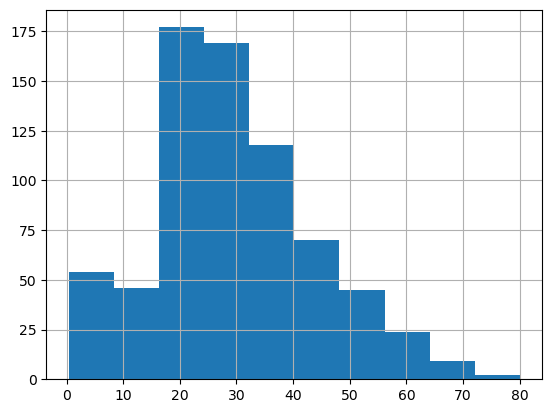

In [101]:
titanic_train["Age"].hist()

From the histogram we see that most of the ages are between 20 and 30. So Using the mean or median would be a good idea. Lets use the median.

In [102]:
titanic_train["Age"].median()

28.0

In [103]:
new_age_var = np.where(titanic_train["Age"].isnull(), 28, titanic_train["Age"]) # Replace missing ages with the median

titanic_train["Age"] = new_age_var

titanic_train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

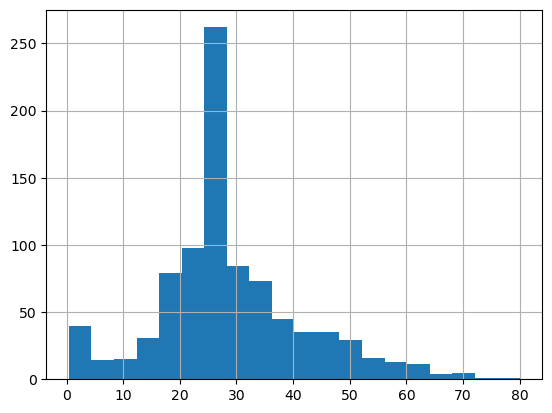

In [106]:
titanic_train['Age'].hist( bins=20)

Some of the ages may be way off but the alternative would be to throw the entire series away. In practice imputing the missing data (estimating age based off of other variables) may have been a better idea. But this is just a simple example.

Next lets consider outliers, Outliers are extreme numerical values that fall far from the other values in a dataset. Outliers can have a significant impact on the data. Some passengers were near 80 years old, which could be unusual. But based on the shape of the data its not suprising.

Now lets take a look at the fare variable. This time we'll use a boxplot , since  they are good for detecting outliers.

<Axes: >

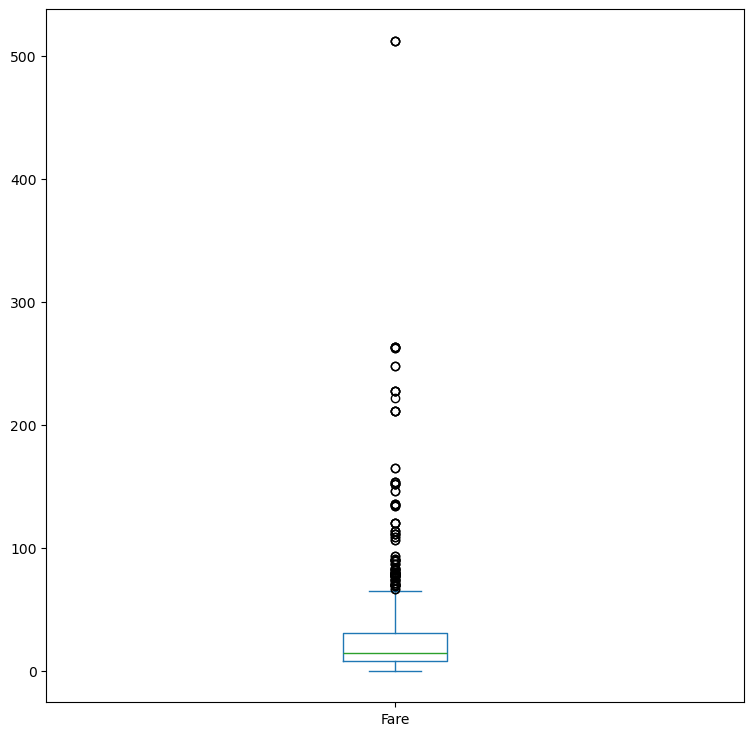

In [108]:
titanic_train["Fare"].plot(kind='box', figsize=(9,9))

Lets determine who paid so the most expensive fare.

In [109]:
index = np.where(titanic_train["Fare"] == max(titanic_train["Fare"]))

titanic_train.iloc[index]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,Survived,Class1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,Survived,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,Survived,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C


Similar to missing values there is no right way to deal with outliers. Some people might want to remove them, others might want to replace them with the median. You can keep them delete them or replace them with something else. Even if you do nothing its still important to the outliers in mind.

Should we crate any new variables?

The variables when you load a dataset aren't always the most useful variables for analysis. Sometimes you need to create new variables that are combinations or derivations of existing variables.

In [110]:
titanic_train['Family'] = titanic_train['SibSp'] + titanic_train['Parch'] # Number of family members instead of siblings and parents

In [113]:
most_family = np.where(titanic_train['Family'] == max(titanic_train['Family'])) # Who has the most family members

titanic_train.loc[most_family]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,Died,Class3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,n,S,10
180,Died,Class3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,n,S,10
201,Died,Class3,"Sage, Mr. Frederick",male,28.0,8,2,69.55,n,S,10
324,Died,Class3,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,n,S,10
792,Died,Class3,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,n,S,10
846,Died,Class3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,n,S,10
863,Died,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,n,S,10
